# Load Dataset

In [131]:
import numpy as np 
import pandas as pd 
dataset = pd.read_csv('train.csv', error_bad_lines=False).fillna(' ')

In [132]:
display(dataset.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data Cleaning
In this section, we clean the dataset for further analysis

### Aggregate to Binary Classification
Here we combine all toxic classification into one general classification

In [133]:
dataset['toxic'] = ((dataset['toxic'] + dataset['severe_toxic'] + dataset['obscene'] + dataset['threat'] + dataset['insult'] + dataset['identity_hate']) > 0).astype(int)
dataset = dataset.drop(columns=['severe_toxic', 'threat', 'insult', 'identity_hate', 'obscene','identity_hate'])
display(dataset[200:250].head())

,id,comment_text,toxic
200,007f127033d66db5,"""\n\n Link to Sacramento \n\nI placed a wikipe...",0
201,007f1839ada915e6,Your blatant POV pushing \n\nNeither of you gu...,1
202,00803f08f55bdcad,"""\nReliable sources indicate otherwise. Please...",0
203,008198c5a9d85a8e,"I did research thank you very much, and it is ...",0
204,00822d0d01752c7e,"""\n\nA """"TotallyDisputed"""" notice would probab...",0


### A quick look on the dataset
* Some contains URLs, newline character, wikitext markup, extra white spaces
* Some toxic comments fully contain all-caps words
* Most toxic comments contain profanity
* Many punctuations and capitalization are not following proper grammar
* Some data do not contain any words or letters

In [136]:
toxic_samples = pd.DataFrame( dataset[dataset['toxic'] == 1]['comment_text'].reset_index(drop=True))
toxic_samples.rename(columns = {'comment_text': 'toxic'}, inplace = True)
non_toxic_samples = pd.DataFrame(dataset[dataset['toxic'] == 0]['comment_text'].reset_index(drop=True))
non_toxic_samples.rename(columns = {'comment_text': 'non_toxic'}, inplace = True)
comments = pd.concat([toxic_samples[200:250], non_toxic_samples[200:250]], axis=1)
display(comments)

,toxic,non_toxic
200,Aaron Swartz \n\nStop fucking reverting my god...,"""\n\n An important message \n\nBlock me. I can..."
201,I wish to restate the AN thread as neutral and...,I'm moving this to the talk page.
202,Why the hell did you fucking write that?! I ca...,"""\nVery well. I see that consensus has formed ..."
203,"My side of the story\n\nAttention, douchebags ...",http://www.users.bigpond.com/MONTDALE/page8.ht...
204,"Moral Defense, you slimy toad you.","""\nThe organization of sub-topics. Culture is ..."
205,You're biased. I made it a point since I signe...,"I don't know the answer to this, but\n\nLegall..."
206,well fag... block me. \n\nblock me?! oh the wo...,Decesed group members \n\nI've seen a few arti...
207,I'm sorry that I must say this. I have never c...,Fatima bint Asad \nI noticed you added a large...
208,Fartsalot56 says f**k you motherclucker!!,"""\n\nI added information about Mayor de Blasio..."
209,You must have the lowest IQ of anyone on wikip...,Please stop adding nonsense to Wikipedia. It i...


In [137]:
display(non_toxic_samples['non_toxic'][234])

'"#if:|==  ==|}}\n{| width=""100%"" style=""background:transparent""\n{| width=""100%"" style=""background-color:#""\n|style=""width: 50%; border:1px solid #; background-color:#; vertical-align:top""|\n Hello, Lceliku, and Welcome to Wikipedia!\nPlease remember to sign your name on talk pages by clicking  or using four tildes (~~~~); this will automatically produce your username and the date. Also, please do your best to always fill in the edit summary field. Below are some useful links to facilitate your involvement.\nHappy editing!   \n{| width=""100%"" style=""background-color:#""\n|style=""width: 50%; border:0; background-color:#; vertical-align:top""|\n Getting started Introduction\n The five pillars of Wikipedia\n How to edit a page\n Intuitive guide to Wikipedia Finding your way around Table of contents\n Department directory Editing articles How to develop an article\n Manual of Style\n|style=""width: 50%; border:0; background-color:#; vertical-align:top""|\n{| width=""100%"" c

### Noise removal
Here we remove texts that will not be processing
* Disregard rows with Wiki markup
* Remove URLs
* Remove extra white spaces and newline characters
* Remove data that doesn't contain any letter

In [208]:
import re
clean_dataset = dataset
markups = clean_dataset[clean_dataset['comment_text'].str.contains("style=")].index
clean_dataset.drop(markups , inplace=True)
clean_dataset = clean_dataset.reset_index(drop=True)
clean_dataset =  clean_dataset[clean_dataset['comment_text'].str.contains('[A-Za-z]')]
clean_dataset['comment_text'] = clean_dataset['comment_text'].apply(lambda text: re.sub(r'http\S+', ' ', text))
clean_dataset['comment_text'] = clean_dataset['comment_text'].apply(lambda text: re.sub(r'^\s*|\s\s*', ' ', text).strip())

In [209]:
clean_dataset.to_csv('clean_dataset.csv', index=False)

# Data Exploration

In [232]:
dataset = pd.read_csv('clean_dataset.csv', error_bad_lines=False).fillna(' ')

### Dominant Class
* The comments are predominantly non-toxic

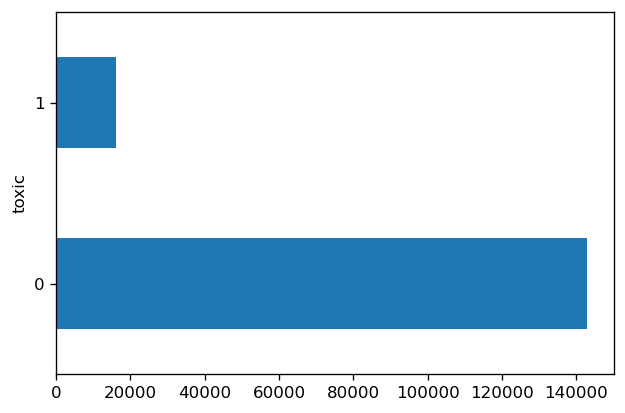

In [241]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
dataset.groupby('toxic')['toxic'].count().plot(kind='barh', ax=ax)

## Preprocessing Pipelines

In [255]:
dataset = pd.read_csv('clean_dataset.csv', error_bad_lines=False).fillna(' ')
display(dataset.head())

,id,comment_text,toxic
0,0000997932d777bf,Explanation Why the edits made under my userna...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


#### Preprocessing techniques

In [277]:
import nltk
from nltk.tokenize import word_tokenize
import unicodedata
import string
import contractions
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

def remove_special_characters(text):
    return re.sub(r'[^a-zA-z0-9.,*!?/:;\"\'\s]', '', text)
def casefolding(text):
    return ''.join(word.lower() for word in text)
def remove_punc(text):
    return ''.join([word for word in text if word not in string.punctuation])
def tokenize(text):
    return word_tokenize(text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', text)
def remove_numbers(text):
    return re.sub(r'[^a-zA-z.,!?/:;\"\'\s]' , '', text)
def remove_extra_white_spaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()
def convert_accented_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
def expand_contractions(text):
    return contractions.fix(text)
def lowercase(text):
    return ''.join(word.lower() for word in text)
def remove_punc(text):
    return ''.join([word for word in text if word not in string.punctuation])

def tokenize(text):
    return nltk.word_tokenize(text)

def lemmatize(text):
    new_text = []
    for word, tag in pos_tag(text):
        new_text.append(lemmatizer.lemmatize(word))
    return ' '.join(new_text)

def remove_stop

def lemmatize_and_filter_1(text):
    new_text = []
    for word, tag in pos_tag(text):
        if tag.startswith("NN"):
            new_text.append(lemmatizer.lemmatize(word, pos='n'))
    return lowercase(' '.join(new_text))

def lemmatize_and_filter_2(text):
    new_text = []
    for word, tag in pos_tag(text):
        if tag.startswith("NN"):
            new_text.append(lemmatizer.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            new_text.append(lemmatizer.lemmatize(word, pos='v'))
    return lowercase(' '.join(new_text))

def lemmatize_and_filter_3(text):
    new_text = []
    for word, tag in pos_tag(text):
        if tag.startswith("ADJ"):
            new_text.append(lemmatizer.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            new_text.append(lemmatizer.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            new_text.append(lemmatizer.lemmatize(word, pos='a'))
    return lowercase(' '.join(new_text))

In [274]:
dataset_processed = dataset
dataset_processed['clean'] = dataset_processed['comment_text'].apply(lambda text: convert_accented_characters(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: remove_special_characters(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: remove_numbers(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: remove_punc(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: expand_contractions(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: lowercase(text))
dataset_processed['clean'] = dataset_processed['clean'].apply(lambda text: remove_extra_white_spaces(text))

In [275]:
dataset_processed['tokenized'] = dataset_processed['clean'].apply(lambda text: tokenize(text))

In [279]:
dataset_processed['lem'] =  dataset_processed['tokenized'].apply(lambda text: lemmatize(text))
dataset_processed['lem1'] =  dataset_processed['tokenized'].apply(lambda text: lemmatize_and_filter_1(text))
dataset_processed['lem2'] =  dataset_processed['tokenized'].apply(lambda text: lemmatize_and_filter_2(text))
dataset_processed['lem3'] =  dataset_processed['tokenized'].apply(lambda text: lemmatize_and_filter_3(text))

In [281]:
dataset_processed.to_csv('processed.csv', index=False)

# Split Train and Test Sets

In [315]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('processed.csv',error_bad_lines=False).fillna(' ')
df.drop(columns=['id', 'comment_text', 'clean', 'tokenized'], inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df['lem'], df['toxic'], train_size=0.70,test_size=0.30, random_state=101)
display(len(X_train))
display(len(X_test))

111423

47754

In [316]:
# Shuffle the dataset
df = df.sample(frac=1)
df_train = df[0:111423]
df_test = df[111423:]

In [328]:
display(df_train.head())

,toxic,lem,lem1,lem2,lem3
100167,0,hello tryptofish i am soapcooker,tryptofish i soapcooker,tryptofish i be soapcooker,hello tryptofish i be soapcooker
112296,0,hello ensiform i am not impressed by the dozen...,hello ensiform i dozen book amazon reason rese...,hello ensiform i be impress dozen book amazon ...,hello ensiform i be impress dozen book amazon ...
101495,0,yeah i did not think i saw any of the crow tea...,yeah i i crow team detonation someone subject ...,yeah i do think i saw crow team get detonation...,yeah i do think i saw crow team get shot pj nu...
152561,1,lay off back off reverting my letter to newyor...,letter jerk,lay revert letter newyorkbrad jerk do have get,lay revert letter newyorkbrad jerk do have get...
46653,0,parafnfal hey i wa wondering where you got ima...,parafnfal hey i i fal page id,parafnfal hey i be wonder get i have see fal r...,parafnfal hey i be wonder get imagemodernparaf...


# Create diferent BOWs

In [319]:
# Initialize count_vectorizer model
# Focus on unigrams, removed tokens >0.95 and less than 5 occurences
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')

bow_train = []
bow_test = []
for col in df.columns[1:]:
    bow_train.append(count_vec.fit_transform(df_train[col]))
    bow_test.append(count_vec.transform(df_test[col]))

# Establishing the Baseline - What is the score to beat?


### Baseline 1: Base Rate

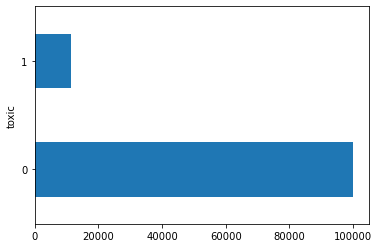

In [320]:
df_train.groupby('toxic').count()['lem'].plot(kind='barh')

In [321]:
from sklearn.metrics import accuracy_score
baseline_pred = [0]*df_train.shape[0]
base_rate = accuracy_score(y_true=df_train['toxic'],
                           y_pred=[0]*df_train.shape[0])

print(f'Baseline (Base Rate): {np.round(100*base_rate,2)}% Accuracy')

Baseline (Base Rate): 89.83% Accuracy


### Baseline 2: Random Chance Simulation

Mean Accuracy when Using Random Labeling: 81.73%
Standard Deviation: 0.0005533436874676284


[0.8170934187735028,
 0.8170754691580733,
 0.8174883103129515,
 0.8175960080055285,
 0.8180806476221247,
 0.8168959730037784,
 0.8163574845408937,
 0.8166446783877656,
 0.8180985972375542,
 0.8171293180043617]

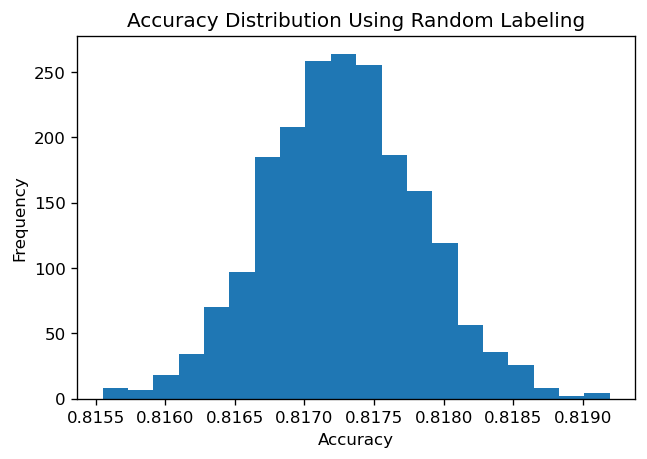

In [322]:
random_acc_results = [accuracy_score(y_true=df_train['toxic'],
                                     y_pred=df_train['toxic'].sample(frac=1))
                      for i in range(2000)]

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.hist(random_acc_results, bins=20)
ax.set_title('Accuracy Distribution Using Random Labeling')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Frequency')

print(f'Mean Accuracy when Using Random Labeling: {np.round(100*np.mean(random_acc_results),2)}%')
print(f'Standard Deviation: {np.std(random_acc_results)}')
random_acc_results[:10]

### Baseline 2: Random Chance PCC Computation¶

In [323]:
base_rate**2 + (1-base_rate)**2

0.8172817635180916

# Model the Different BOWs

In [324]:
from sklearn.naive_bayes import MultinomialNB
models = []
model = MultinomialNB()

for bow in bow_train:
    model = MultinomialNB()
    models.append(model.fit(bow, df_train['toxic']))

# Validate Results Using Test Set

### Accuracy

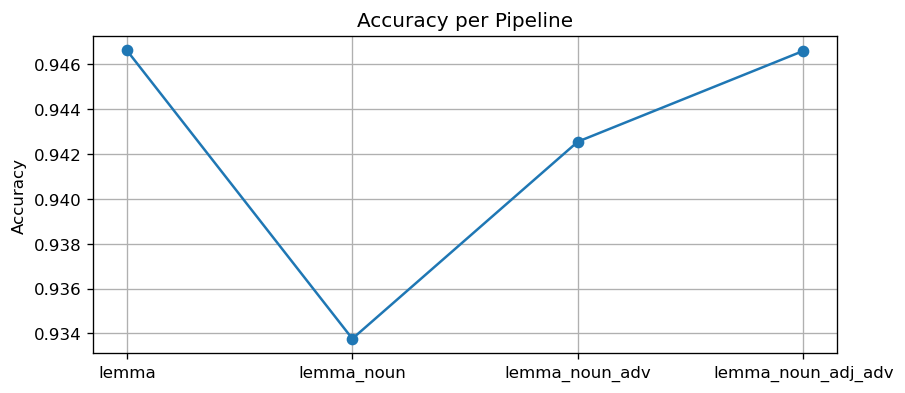

In [351]:
acc_results = [accuracy_score(y_true=df_test['toxic'],
                              y_pred=model.predict(test_data))
               for model, test_data, title in zip(models,
                                                  bow_test,
                                                  df.columns[1:])]


### Confusion Matrix

toxic
0    42862
1     4892
Name: lem, dtype: int64

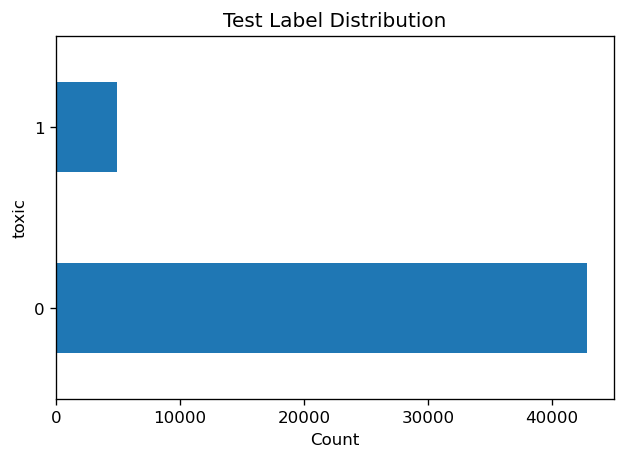

In [330]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
df_test.groupby('toxic').count()['lem'].plot(kind='barh', ax=ax)
ax.set_xlabel('Count');
ax.set_title('Test Label Distribution')
display(df_test.groupby('toxic').count()['lem'])

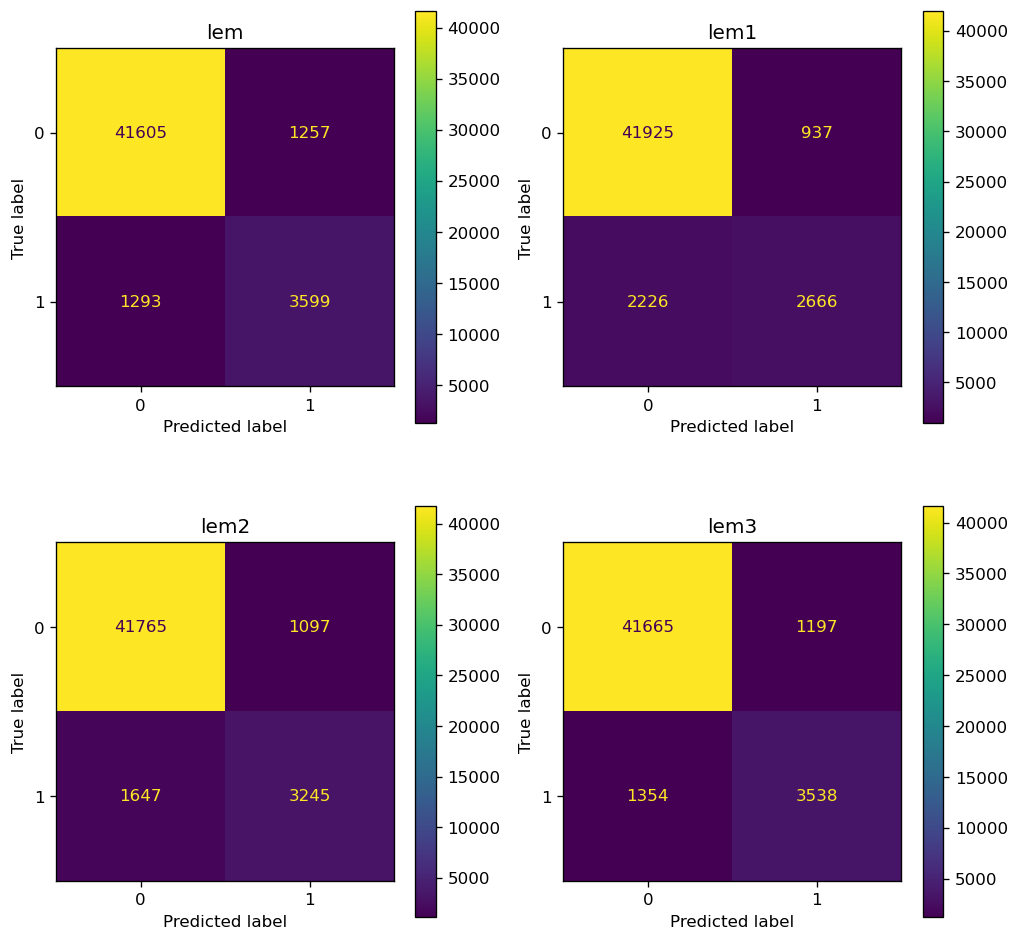

In [334]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(2,2, figsize=(10,10), dpi=120)
i = 0
for model, test_data, title in zip(models, bow_test, df.columns[1:]):
    ax[int(i/2)][i%2].set_title(title)
    plot_confusion_matrix(model, test_data, df_test['toxic'], 
                          ax=ax[int(i/2)][i%2], values_format='d')
    i+=1

# Precision Recall and F1 Score Across Different Pipelines

In [340]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

predictions = [model.predict(test_data) for model,
               test_data in zip(models, bow_test)]

scores = []
for prediction in predictions:
    scores.append((f1_score(y_true=df_test['toxic'],
                            y_pred=prediction),
                   fbeta_score(y_true=df_test['toxic'],
                               y_pred=prediction, beta=2),
                   fbeta_score(y_true=df_test['toxic'],
                               y_pred=prediction, beta=0.5),
                   precision_score(y_true=df_test['toxic'],
                                   y_pred=prediction),
                   recall_score(y_true=df_test['toxic'],
                                y_pred=prediction)))

,f1,f2,f0.5,precision,recall
pipeline1,0.738408,0.736775,0.740048,0.741145,0.735691
pipeline2,0.627663,0.575288,0.690530,0.739939,0.544971
pipeline3,0.702837,0.678586,0.728886,0.747351,0.663328
pipeline4,0.735016,0.727894,0.742279,0.747202,0.723222


(0.5, 0.8)

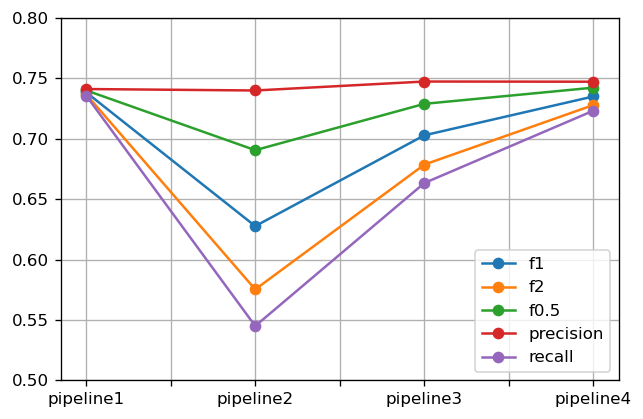

In [347]:
df_scores = pd.DataFrame(scores, columns=['f1', 'f2','f0.5','precision','recall'],
             index=['pipeline1','pipeline2','pipeline3','pipeline4'])
df_scores

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
df_scores.plot(kind='line', style='o-', ax=ax)
ax.grid()
ax.set_ylim(0.5,0.8)

## PR Curve for Across Different Pipelines

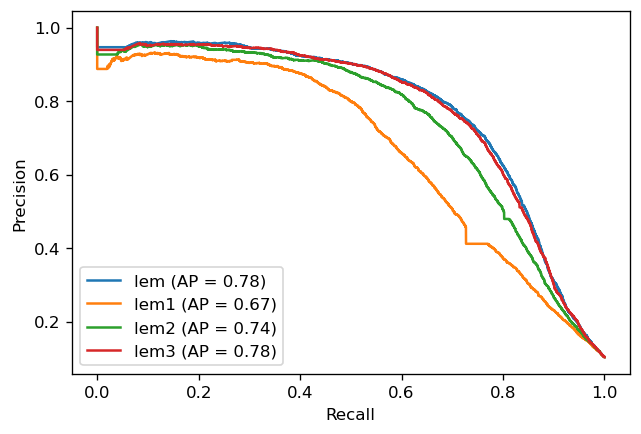

In [350]:
from sklearn.metrics import plot_precision_recall_curve
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
for model, test_data, title in zip(models, bow_test, df.columns[1:]):
    plot_precision_recall_curve(model, test_data, df_test['toxic'], 
                                ax=ax, name=title)

# Hyperpatameter Tuning

In [357]:
from sklearn.model_selection import GridSearchCV

In [360]:
param_grid = {'alpha':[0,1,2,3,4,5]}
model = MultinomialNB()

g_cv = GridSearchCV(model, param_grid, n_jobs=-1, scoring='f1', cv=5)
g_cv.fit(bow_train[0], df_train['toxic'])

g_cv_4 = GridSearchCV(model, param_grid, n_jobs=-1, scoring='f1', cv=5)
g_cv_4.fit(bow_train[-1], df_train['toxic'])

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 4, 5]}, scoring='f1')

In [362]:
pd.DataFrame(g_cv.cv_results_) #pipeline 1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.245544,0.091020,0.068018,0.034151,0,{'alpha': 0},0.661608,0.673166,0.673215,0.665067,0.660564,0.666724,0.005486,6
1,0.236170,0.053929,0.061512,0.031037,1,{'alpha': 1},0.726093,0.744948,0.725711,0.722442,0.722649,0.728368,0.008426,1
2,0.195264,0.055164,0.027781,0.001187,2,{'alpha': 2},0.719290,0.730734,0.723136,0.718237,0.716425,0.721564,0.005084,2
3,0.233744,0.061199,0.052632,0.021491,3,{'alpha': 3},0.712727,0.722824,0.721349,0.712862,0.707777,0.715508,0.005694,3
4,0.237163,0.020312,0.039903,0.014863,4,{'alpha': 4},0.700257,0.712905,0.710889,0.706578,0.703099,0.706746,0.004702,4
5,0.159474,0.036250,0.025595,0.000491,5,{'alpha': 5},0.692641,0.705068,0.701848,0.696815,0.695842,0.698443,0.004440,5


In [363]:
pd.DataFrame(g_cv_4.cv_results_) #pipeline 4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.167257,0.046880,0.041917,0.025074,0,{'alpha': 0},0.665545,0.669295,0.677694,0.667632,0.658412,0.667716,0.006218,6
1,0.210584,0.027602,0.044902,0.018469,1,{'alpha': 1},0.717756,0.739308,0.728129,0.719111,0.711977,0.723256,0.009551,1
2,0.213179,0.047097,0.042734,0.022658,2,{'alpha': 2},0.710811,0.728028,0.719362,0.711687,0.709488,0.715875,0.006983,2
3,0.242211,0.036792,0.032420,0.010086,3,{'alpha': 3},0.702940,0.721829,0.709979,0.703497,0.700693,0.707788,0.007671,3
4,0.177183,0.027201,0.034180,0.010136,4,{'alpha': 4},0.693069,0.713839,0.702548,0.696608,0.693781,0.699969,0.007697,4
5,0.134014,0.024429,0.024770,0.004057,5,{'alpha': 5},0.682950,0.704894,0.696970,0.685393,0.686762,0.691394,0.008272,5


# Best Model

Since 2 models almost perform the same, we use these 2 models

In [367]:
model1 = MultinomialNB(alpha=1)
model1.fit(bow_train[0], df_train['toxic'])
pred1 = model1.predict(bow_test[0])

model2 = MultinomialNB(alpha=1)
model2.fit(bow_train[-1], df_train['toxic'])
pred2 = model2.predict(bow_test[-1])

In [369]:
df_scores = df_scores.append(pd.DataFrame([(f1_score(y_true=df_test['toxic'],
          y_pred=pred1),
 fbeta_score(y_true=df_test['toxic'],
             y_pred=pred1, beta=2),
 fbeta_score(y_true=df_test['toxic'],
             y_pred=pred1, beta=0.5),
 precision_score(y_true=df_test['toxic'],
                 y_pred=pred1),
 recall_score(y_true=df_test['toxic'],
              y_pred=pred1))], columns=df_scores.columns, index=['final_model1']))

df_scores = df_scores.append(pd.DataFrame([(f1_score(y_true=df_test['toxic'],
          y_pred=pred2),
 fbeta_score(y_true=df_test['toxic'],
             y_pred=pred2, beta=2),
 fbeta_score(y_true=df_test['toxic'],
             y_pred=pred2, beta=0.5),
 precision_score(y_true=df_test['toxic'],
                 y_pred=pred2),
 recall_score(y_true=df_test['toxic'],
              y_pred=pred2))], columns=df_scores.columns, index=['final_model2']))

In [370]:
display(df_scores)

,f1,f2,f0.5,precision,recall
pipeline1,0.738408,0.736775,0.740048,0.741145,0.735691
pipeline2,0.627663,0.575288,0.690530,0.739939,0.544971
pipeline3,0.702837,0.678586,0.728886,0.747351,0.663328
pipeline4,0.735016,0.727894,0.742279,0.747202,0.723222
final_model1,0.738408,0.736775,0.740048,0.741145,0.735691
final_model2,0.735016,0.727894,0.742279,0.747202,0.723222


#### The final model 1 performs a bit better than the 2nd

# PR Curve Of "Best Pipeline"

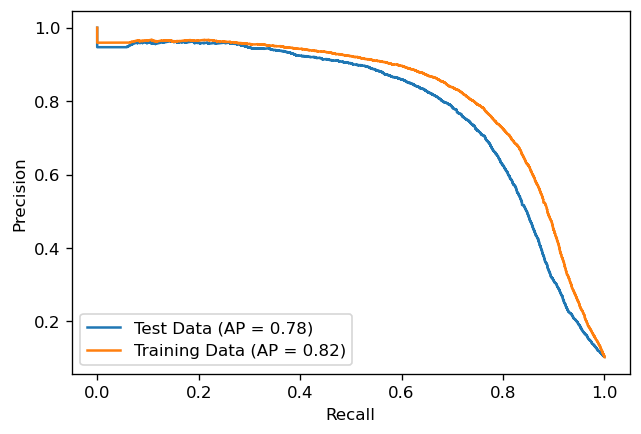

In [373]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
plot_precision_recall_curve(model1, bow_test[0], df_test['toxic'],
                            ax=ax, name='Test Data')
plot_precision_recall_curve(model1, bow_train[0], df_train['toxic'],
                            ax=ax, name='Training Data')
